In [43]:
patients <- read.table("project_data.txt", header = FALSE, sep = "", dec = ".")
colnames(patients) <- c("id", "psa_level", "cancer_volume", "weight", "age", "benign_prostatic_hyperplasia", "seminal_vesicle_invasion", "capsular_penetration", "gleason_score")
head(patients)

id,psa_level,cancer_volume,weight,age,benign_prostatic_hyperplasia,seminal_vesicle_invasion,capsular_penetration,gleason_score
1,0.651,0.5599,15.959,50,0,0,0,6
2,0.852,0.3716,27.660,58,0,0,0,7
3,0.852,0.6005,14.732,74,0,0,0,7
4,0.852,0.3012,26.576,58,0,0,0,6
5,1.448,2.1170,30.877,62,0,0,0,6
6,2.160,0.3499,25.280,50,0,0,0,6


In [44]:
summary(patients)
round(cor(patients[c("psa_level","cancer_volume","weight","age","benign_prostatic_hyperplasia","seminal_vesicle_invasion","capsular_penetration","gleason_score")]),3) 

       id       psa_level       cancer_volume         weight      
 Min.   : 1   Min.   :  0.651   Min.   : 0.2592   Min.   : 10.70  
 1st Qu.:25   1st Qu.:  5.641   1st Qu.: 1.6653   1st Qu.: 29.37  
 Median :49   Median : 13.330   Median : 4.2631   Median : 37.34  
 Mean   :49   Mean   : 23.730   Mean   : 6.9987   Mean   : 45.49  
 3rd Qu.:73   3rd Qu.: 21.328   3rd Qu.: 8.4149   3rd Qu.: 48.42  
 Max.   :97   Max.   :265.072   Max.   :45.6042   Max.   :450.34  
      age        benign_prostatic_hyperplasia seminal_vesicle_invasion
 Min.   :41.00   Min.   : 0.000               Min.   :0.0000          
 1st Qu.:60.00   1st Qu.: 0.000               1st Qu.:0.0000          
 Median :65.00   Median : 1.350               Median :0.0000          
 Mean   :63.87   Mean   : 2.535               Mean   :0.2165          
 3rd Qu.:68.00   3rd Qu.: 4.759               3rd Qu.:0.0000          
 Max.   :79.00   Max.   :10.278               Max.   :1.0000          
 capsular_penetration gleason_scor

,psa_level,cancer_volume,weight,age,benign_prostatic_hyperplasia,seminal_vesicle_invasion,capsular_penetration,gleason_score
psa_level,1.000,0.624,0.026,0.017,-0.016,0.529,0.551,0.430
cancer_volume,0.624,1.000,0.005,0.039,-0.133,0.582,0.693,0.481
weight,0.026,0.005,1.000,0.164,0.322,-0.002,0.002,-0.024
age,0.017,0.039,0.164,1.000,0.366,0.118,0.100,0.226
benign_prostatic_hyperplasia,-0.016,-0.133,0.322,0.366,1.000,-0.120,-0.083,0.027
seminal_vesicle_invasion,0.529,0.582,-0.002,0.118,-0.120,1.000,0.680,0.429
capsular_penetration,0.551,0.693,0.002,0.100,-0.083,0.680,1.000,0.462
gleason_score,0.430,0.481,-0.024,0.226,0.027,0.429,0.462,1.000


## Fit "Full" model

In [45]:
fit0 <- lm(psa_level ~ cancer_volume + age + benign_prostatic_hyperplasia + seminal_vesicle_invasion + gleason_score + weight + capsular_penetration, data=patients)
summary(fit0)
anova(fit0)


Call:
lm(formula = psa_level ~ cancer_volume + age + benign_prostatic_hyperplasia + 
    seminal_vesicle_invasion + gleason_score + weight + capsular_penetration, 
    data = patients)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.330  -8.130  -0.014   6.324 167.436 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -15.24264   40.53932  -0.376 0.707814    
cancer_volume                  2.03225    0.59359   3.424 0.000936 ***
age                           -0.53721    0.47588  -1.129 0.261977    
benign_prostatic_hyperplasia   1.29831    1.20168   1.080 0.282878    
seminal_vesicle_invasion      19.60957   10.89184   1.800 0.075187 .  
gleason_score                  7.05922    5.19452   1.359 0.177589    
weight                         0.01132    0.07395   0.153 0.878708    
capsular_penetration           1.09877    1.33377   0.824 0.412253    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
cancer_volume,1,62202.342713,62202.342713,64.031658406,4.304312e-12
age,1,8.293344,8.293344,0.008537244,9.265901e-01
benign_prostatic_hyperplasia,1,909.506681,909.506681,0.936254465,3.358651e-01
seminal_vesicle_invasion,1,7366.623010,7366.623010,7.583268855,7.141763e-03
gleason_score,1,2047.216451,2047.216451,2.107423270,1.501020e-01
weight,1,21.096812,21.096812,0.021717251,8.831751e-01
capsular_penetration,1,659.264249,659.264249,0.678652626,4.122532e-01
Residuals,89,86457.365611,971.431074,NA,NA


## Perform Backward Elimination, Forward Selection using individual t tests

In [46]:
stepT(fit0,alpha.rem=0.05,alpha.enter=0.05,direction="both")

psa_level ~ 1
----------------------------------------------
Step 1 -> Adding:+ cancer_volume 
              Estimate Pr(>|t|)
(Intercept)      1.125    0.797
cancer_volume    3.230    0.000

psa_level ~ cancer_volume
----------------------------------------------
Step 2 -> Adding:+ seminal_vesicle_invasion 
                         Estimate Pr(>|t|)
(Intercept)                 1.060    0.803
cancer_volume               2.477    0.000
seminal_vesicle_invasion   24.647    0.010

psa_level ~ cancer_volume + age + benign_prostatic_hyperplasia + 
    seminal_vesicle_invasion + gleason_score + weight + capsular_penetration
----------------------------------------------
Step 1 -> Removing:- weight 
                             Estimate Pr(>|t|)
(Intercept)                   -14.746    0.715
cancer_volume                   2.038    0.001
age                            -0.533    0.262
benign_prostatic_hyperplasia    1.352    0.240
seminal_vesicle_invasion       19.644    0.073
gleason_score   


Call:
lm(formula = psa_level ~ cancer_volume + seminal_vesicle_invasion, 
    data = patients)

Coefficients:
             (Intercept)             cancer_volume  seminal_vesicle_invasion  
                   1.060                     2.477                    24.647  


In [50]:
library(MASS)

In [55]:
fit1 <- lm(psa_level ~ cancer_volume + age + benign_prostatic_hyperplasia + seminal_vesicle_invasion + gleason_score + weight + capsular_penetration, data=patients)
fit2 <- lm(psa_level ~ 1, data=patients)
fit3=stepAIC(fit1, direction="backward")
# stepAIC(fit2, direction="forward",scope=list(upper=fit1, lower=fit2))
# stepAIC(fit2, direction)

Start:  AIC=674.89
psa_level ~ cancer_volume + age + benign_prostatic_hyperplasia + 
    seminal_vesicle_invasion + gleason_score + weight + capsular_penetration

                               Df Sum of Sq   RSS    AIC
- weight                        1      22.8 86480 672.92
- capsular_penetration          1     659.3 87117 673.63
- benign_prostatic_hyperplasia  1    1133.9 87591 674.16
- age                           1    1238.0 87695 674.27
- gleason_score                 1    1794.0 88251 674.88
<none>                                      86457 674.89
- seminal_vesicle_invasion      1    3148.8 89606 676.36
- cancer_volume                 1   11386.7 97844 684.89

Step:  AIC=672.92
psa_level ~ cancer_volume + age + benign_prostatic_hyperplasia + 
    seminal_vesicle_invasion + gleason_score + capsular_penetration

                               Df Sum of Sq   RSS    AIC
- capsular_penetration          1     657.6 87138 671.65
- age                           1    1222.0 87702 672.28

In [56]:
stepAIC(fit2,direction="forward",scope=list(upper=fit1,lower=fit2))
stepAIC(fit2,direction="both",scope=list(upper=fit1,lower=fit2))

Start:  AIC=720.4
psa_level ~ 1

                               Df Sum of Sq    RSS    AIC
+ cancer_volume                 1     62202  97469 674.52
+ capsular_penetration          1     48440 111232 687.33
+ seminal_vesicle_invasion      1     44618 115053 690.61
+ gleason_score                 1     29466 130206 702.61
<none>                                      159672 720.40
+ weight                        1       110 159562 722.33
+ age                           1        47 159624 722.37
+ benign_prostatic_hyperplasia  1        43 159628 722.37

Step:  AIC=674.52
psa_level ~ cancer_volume

                               Df Sum of Sq   RSS    AIC
+ seminal_vesicle_invasion      1    6612.6 90857 669.71
+ capsular_penetration          1    4299.7 93170 672.14
+ gleason_score                 1    3463.6 94006 673.01
<none>                                      97469 674.52
+ benign_prostatic_hyperplasia  1     722.2 96747 675.80
+ weight                        1      84.7 97385 676.44



Call:
lm(formula = psa_level ~ cancer_volume + seminal_vesicle_invasion, 
    data = patients)

Coefficients:
             (Intercept)             cancer_volume  seminal_vesicle_invasion  
                   1.060                     2.477                    24.647  


Start:  AIC=720.4
psa_level ~ 1

                               Df Sum of Sq    RSS    AIC
+ cancer_volume                 1     62202  97469 674.52
+ capsular_penetration          1     48440 111232 687.33
+ seminal_vesicle_invasion      1     44618 115053 690.61
+ gleason_score                 1     29466 130206 702.61
<none>                                      159672 720.40
+ weight                        1       110 159562 722.33
+ age                           1        47 159624 722.37
+ benign_prostatic_hyperplasia  1        43 159628 722.37

Step:  AIC=674.52
psa_level ~ cancer_volume

                               Df Sum of Sq    RSS    AIC
+ seminal_vesicle_invasion      1      6613  90857 669.71
+ capsular_penetration          1      4300  93170 672.14
+ gleason_score                 1      3464  94006 673.01
<none>                                       97469 674.52
+ benign_prostatic_hyperplasia  1       722  96747 675.80
+ weight                        1        85  97385 


Call:
lm(formula = psa_level ~ cancer_volume + seminal_vesicle_invasion, 
    data = patients)

Coefficients:
             (Intercept)             cancer_volume  seminal_vesicle_invasion  
                   1.060                     2.477                    24.647  


In [57]:
library(leaps)
allpatients <- regsubsets(psa_level ~ cancer_volume + age + benign_prostatic_hyperplasia + seminal_vesicle_invasion + gleason_score + weight + capsular_penetration,
                        nbest=4,data=patients)
aprout <- summary(allpatients)

,(Intercept),cancer_volume,age,benign_prostatic_hyperplasia,seminal_vesicle_invasion,gleason_score,weight,capsular_penetration,adjr2,cp,bic
1,1,1,0,0,0,0,0,0,0.383,7.336,-38.728
1,1,0,0,0,0,0,0,1,0.296,21.503,-25.916
1,1,0,0,0,1,0,0,0,0.272,25.437,-22.640
1,1,0,0,0,0,1,0,0,0.176,41.035,-10.639
2,1,1,0,0,1,0,0,0,0.419,2.529,-40.968
2,1,1,0,0,0,0,0,1,0.404,4.910,-38.530
2,1,1,0,0,0,1,0,0,0.399,5.770,-37.663
2,1,1,0,1,0,0,0,0,0.381,8.592,-34.875
3,1,1,0,0,1,1,0,0,0.424,2.638,-38.374
3,1,1,0,1,1,0,0,0,0.419,3.529,-37.435


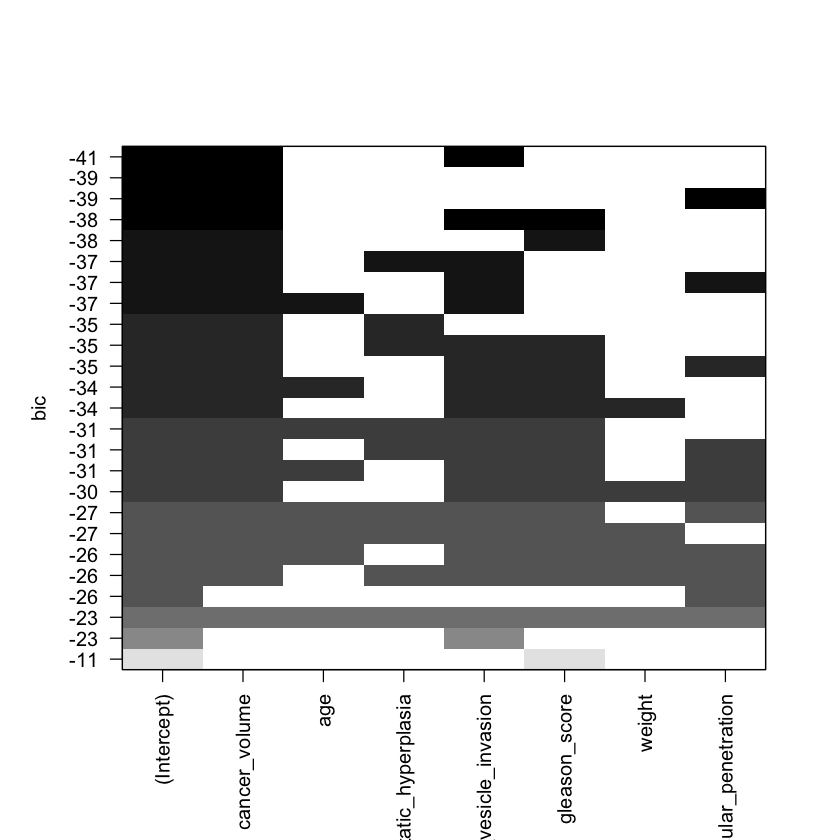

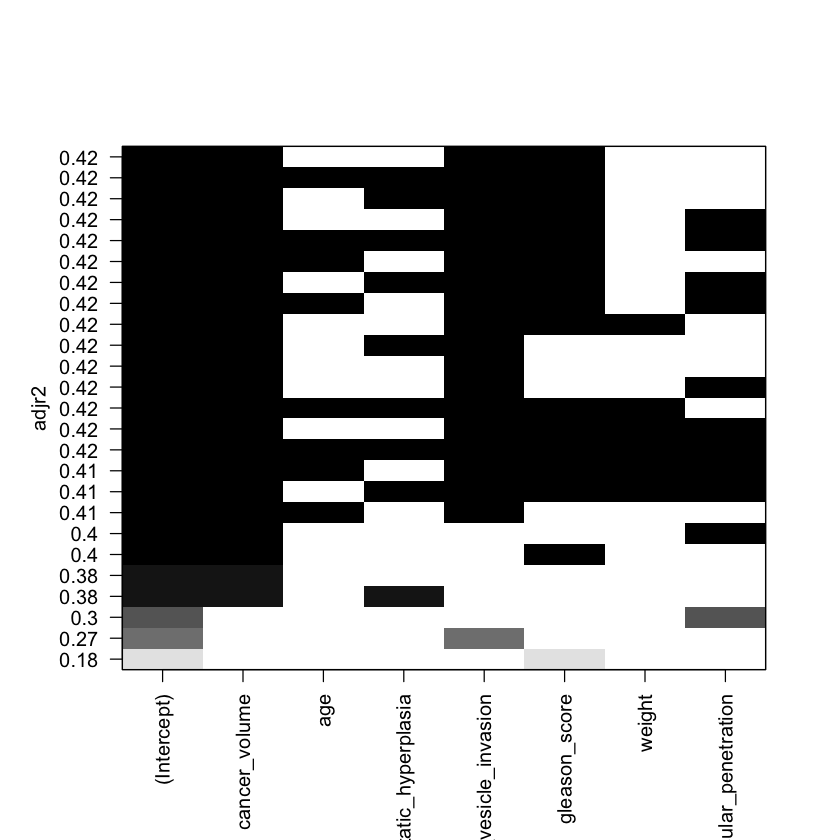

In [60]:
with(aprout,round(cbind(which,adjr2,cp,bic),3))     ## Prints "readable" results
plot(allpatients,scale="bic")
plot(allpatients,scale="adjr2")